IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M4\FAULT_M4_5


VOLO m4 FAULT 5%

In [3]:
rcou_m4_fault5 = pd.read_csv("RCOU.csv")
rcou_m4_fault5 = rcou_m4_fault5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m4_fault5 = rcou_m4_fault5[((rcou_m4_fault5['C9'] >= 1400) & (rcou_m4_fault5['C10'] >= 1400) & (rcou_m4_fault5['C11'] >= 1400) & (rcou_m4_fault5['C12'] >= 1400) & (rcou_m4_fault5['C13'] >= 1400) & (rcou_m4_fault5['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m4_fault5)

,TimeUS,C9,C10,C11,C12,C13,C14
225,121424667,1408,1411,1412,1407,1409,1410
228,121456481,1474,1408,1412,1471,1444,1440
229,121467192,1412,1492,1473,1433,1431,1474
234,121519915,1581,1430,1409,1597,1488,1531
235,121530107,1495,1549,1503,1542,1471,1571
...,...,...,...,...,...,...,...
5382,178639576,1630,1424,1638,1414,1489,1579
5389,178714326,1632,1403,1601,1444,1476,1575
5393,178757571,1615,1404,1594,1433,1469,1564
5394,178767858,1610,1406,1580,1446,1454,1573


In [4]:
xkf1_m4_fault5 = pd.read_csv("XKF1_0.csv")
xkf1_m4_fault5 = xkf1_m4_fault5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m4_fault5 = xkf1_m4_fault5[((xkf1_m4_fault5['TimeUS'] >= 121424667) & (xkf1_m4_fault5['TimeUS'] <= 178858913))]
print(xkf1_m4_fault5)

         TimeUS  Roll  Pitch    Yaw
226   121432861  1.10   0.86  11.75
227   121442909  1.16   0.87  11.74
228   121453711  1.13   0.88  11.75
229   121464609  1.04   0.88  11.74
230   121475181  0.84   0.89  11.76
...         ...   ...    ...    ...
5398  178812690 -0.05   1.22   9.20
5399  178824912 -0.02   0.97   9.07
5400  178835655  0.00   0.79   8.93
5401  178846143  0.00   0.62   8.82
5402  178856096 -0.02   0.43   8.69

[5177 rows x 4 columns]


In [5]:
att_m4_fault5 = pd.read_csv("ATT.csv")
att_m4_fault5 = att_m4_fault5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m4_fault5 = att_m4_fault5[((att_m4_fault5['TimeUS'] >= 121424667) & (att_m4_fault5['TimeUS'] <= 178858913))]
print(att_m4_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
226   121434103     0.29  1.10     -0.20   0.86   11.69  11.75
227   121444886     0.29  1.16     -0.20   0.87   11.69  11.74
228   121455563     0.29  1.13     -0.21   0.88   11.69  11.75
229   121466559     0.30  1.04     -0.22   0.88   11.69  11.74
230   121476723     0.31  0.84     -0.23   0.89   11.69  11.76
...         ...      ...   ...       ...    ...     ...    ...
5398  178813876     2.28 -0.05      0.76   1.22    6.95   9.20
5399  178826372     2.30 -0.02      0.60   0.97    6.94   9.07
5400  178837336     2.32  0.00      0.45   0.79    6.94   8.93
5401  178847331     2.35  0.00      0.31   0.62    6.93   8.82
5402  178858011     2.37 -0.02      0.19   0.43    6.93   8.69

[5177 rows x 7 columns]


In [6]:
att_m4_fault5 = pd.merge_asof(att_m4_fault5,xkf1_m4_fault5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m4_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     121434103     0.29  1.10     -0.20   0.86   11.69  11.75
1     121444886     0.29  1.16     -0.20   0.87   11.69  11.74
2     121455563     0.29  1.13     -0.21   0.88   11.69  11.75
3     121466559     0.30  1.04     -0.22   0.88   11.69  11.74
4     121476723     0.31  0.84     -0.23   0.89   11.69  11.76
...         ...      ...   ...       ...    ...     ...    ...
5172  178813876     2.28 -0.05      0.76   1.22    6.95   9.20
5173  178826372     2.30 -0.02      0.60   0.97    6.94   9.07
5174  178837336     2.32  0.00      0.45   0.79    6.94   8.93
5175  178847331     2.35  0.00      0.31   0.62    6.93   8.82
5176  178858011     2.37 -0.02      0.19   0.43    6.93   8.69

[5177 rows x 7 columns]


In [7]:
esc_3_m4_fault5 = pd.read_csv("ESC_3.csv")
esc_3_m4_fault5 = esc_3_m4_fault5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_3_m4_fault5 = esc_3_m4_fault5[((esc_3_m4_fault5['TimeUS'] >= 121424667) & (esc_3_m4_fault5['TimeUS'] <= 178858913))]
print(esc_3_m4_fault5)

        TimeUS   RPM  Curr
21   121522400  3998  3.42
22   121636335  4976  4.59
23   121744897  5916  4.88
24   121856629  6328  4.06
25   121962376  6299  3.23
26   122070578  5916  3.24
27   122176507  5934  3.38
28   122287617  5765  2.85
29   122397107  5646  3.04
30   122515174  5719  3.09
31   122626692  5634  3.21
32   122726502  5676  1.95
33   122831335  5350  1.92
34   123048593  4997  1.70
35   123272892  4694  2.01
36   123377253  4811  1.74
37   123490351  4780  3.01
38   123600038  5154  3.42
39   123700499  5559  3.54
40   123808504  5733  3.70
41   123913723  5844  3.78
42   124025490  6006  2.94
43   124125585  5908  3.08
44   124354625  5674  3.16
45   124458716  5778  3.05
46   124791346  5653  2.47
47   124893528  5516  2.07
48   125000530  5105  2.96
49   125117492  5337  3.01
50   125229386  5440  2.56
51   125333485  5421  2.53
52   125439003  5270  2.52
53   125550084  5243  2.45
54   125657405  5274  2.22
55   125767250  5135  2.42
56   125872653  5240  2.36
5

In [8]:
imu_2_m4_fault5 = pd.read_csv("IMU_2.csv")
imu_2_m4_fault5 = imu_2_m4_fault5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m4_fault5 = imu_2_m4_fault5[((imu_2_m4_fault5['TimeUS'] >= 121424667) & (imu_2_m4_fault5['TimeUS'] <= 178858913))]
print(imu_2_m4_fault5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY      AccZ
891    121426347 -0.064619 -0.007186 -0.001358  0.132007 -0.119005 -9.908481
892    121429392 -0.047707  0.009100  0.005156  0.169139 -0.053444 -9.823930
893    121431996  0.101188  0.005335  0.002265  0.214895  0.043437 -9.632129
894    121433935  0.133678 -0.005134 -0.000419  0.190652  0.090394 -9.689696
895    121437323 -0.037317 -0.000011  0.002578  0.180219  0.111405 -9.752580
...          ...       ...       ...       ...       ...       ...       ...
20555  178847110 -0.045952 -0.221907 -0.193600  0.601780  0.184901 -9.610149
20556  178850053  0.007346 -0.264784 -0.199028  0.633652  0.164161 -9.280994
20557  178852370  0.026327 -0.401838 -0.218364  0.543415  0.137789 -9.337992
20558  178854843 -0.010647 -0.342378 -0.218698  0.401039  0.143443 -9.645085
20559  178857906 -0.072953 -0.236675 -0.212978  0.248086  0.150457 -9.989474

[19669 rows x 7 columns]


In [9]:
m4_fault5 = pd.merge_asof(att_m4_fault5, imu_2_m4_fault5, on="TimeUS",  tolerance= 100000)
print(m4_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0     121434103     0.29  1.10     -0.20   0.86   11.69  11.75  0.133678   
1     121444886     0.29  1.16     -0.20   0.87   11.69  11.74  0.114906   
2     121455563     0.29  1.13     -0.21   0.88   11.69  11.75  0.032570   
3     121466559     0.30  1.04     -0.22   0.88   11.69  11.74 -0.185548   
4     121476723     0.31  0.84     -0.23   0.89   11.69  11.76 -0.293293   
...         ...      ...   ...       ...    ...     ...    ...       ...   
5172  178813876     2.28 -0.05      0.76   1.22    6.95   9.20 -0.059856   
5173  178826372     2.30 -0.02      0.60   0.97    6.94   9.07 -0.045775   
5174  178837336     2.32  0.00      0.45   0.79    6.94   8.93 -0.033969   
5175  178847331     2.35  0.00      0.31   0.62    6.93   8.82 -0.045952   
5176  178858011     2.37 -0.02      0.19   0.43    6.93   8.69 -0.072953   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.005134 -0.000419  0.1

In [10]:
m4_fault5 = pd.merge_asof(esc_3_m4_fault5, m4_fault5, on="TimeUS",  tolerance= 100000)
print(m4_fault5)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0    121522400  3998  3.42     0.32   1.00     -0.27   0.97   11.69   11.79   
1    121636335  4976  4.59     0.05   1.29     -0.32   0.84   11.69   12.00   
2    121744897  5916  4.88    -0.50   1.88     -0.31   0.59   11.69   12.78   
3    121856629  6328  4.06    -1.49   2.50     -0.24   0.15   11.69   13.96   
4    121962376  6299  3.23    -2.87   2.20      0.28  -0.55   11.66   15.14   
5    122070578  5916  3.24    -4.20   0.67      0.80  -0.05   11.63   16.31   
6    122176507  5934  3.38    -6.49  -1.09      1.22   0.79   11.59   17.41   
7    122287617  5765  2.85    -8.49  -3.51      1.58   1.19   11.55   18.71   
8    122397107  5646  3.04   -10.17  -5.76      1.58   2.06   11.55   19.63   
9    122515174  5719  3.09   -11.26  -7.89      1.26   2.80   11.61   20.06   
10   122626692  5634  3.21   -12.26  -8.65      0.93   2.57   11.19   20.39   
11   122726502  5676  1.95   -12.72  -9.60      0.65

In [11]:
m4_fault5["TimeUS"] = m4_fault5["TimeUS"] - m4_fault5.iloc[0]["TimeUS"]
m4_fault5["TimeUS"] = m4_fault5["TimeUS"].astype(int)
m4_fault5["Guasto"] = 1
print(m4_fault5)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  3998  3.42     0.32   1.00     -0.27   0.97   11.69   11.79   
1      113935  4976  4.59     0.05   1.29     -0.32   0.84   11.69   12.00   
2      222497  5916  4.88    -0.50   1.88     -0.31   0.59   11.69   12.78   
3      334229  6328  4.06    -1.49   2.50     -0.24   0.15   11.69   13.96   
4      439976  6299  3.23    -2.87   2.20      0.28  -0.55   11.66   15.14   
5      548178  5916  3.24    -4.20   0.67      0.80  -0.05   11.63   16.31   
6      654107  5934  3.38    -6.49  -1.09      1.22   0.79   11.59   17.41   
7      765217  5765  2.85    -8.49  -3.51      1.58   1.19   11.55   18.71   
8      874707  5646  3.04   -10.17  -5.76      1.58   2.06   11.55   19.63   
9      992774  5719  3.09   -11.26  -7.89      1.26   2.80   11.61   20.06   
10    1104292  5634  3.21   -12.26  -8.65      0.93   2.57   11.19   20.39   
11    1204102  5676  1.95   -12.72  -9.60      0.65   1.91    9.

In [12]:
path_file = path_file.replace(r"M4\FAULT_M4_5", "")
os.chdir(path_file)
m4_fault5.to_csv('m4_fault5.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

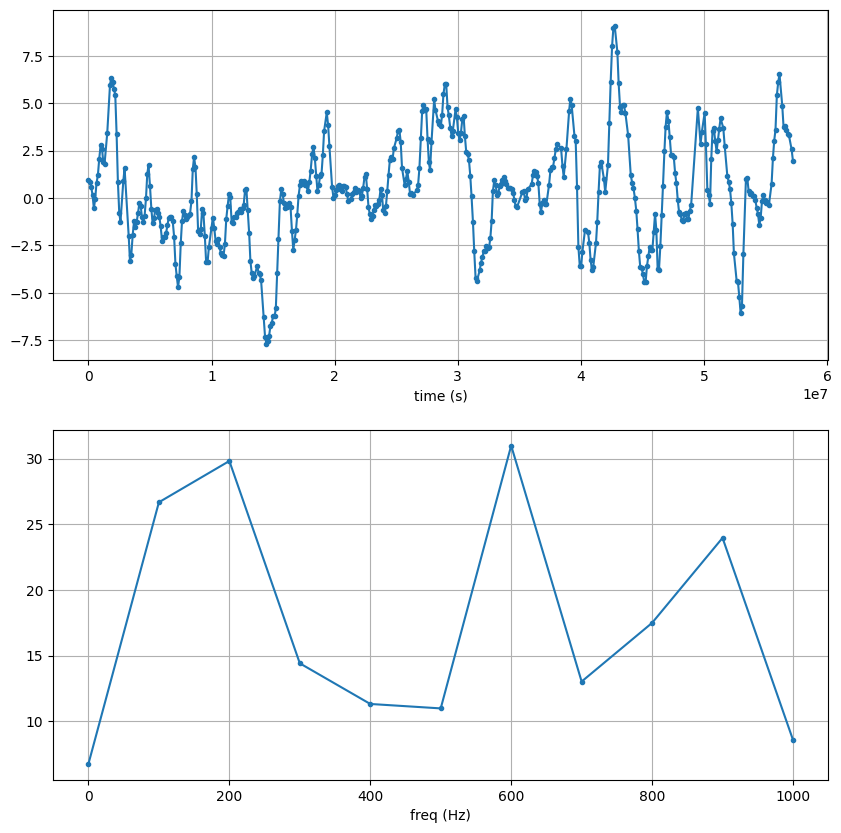

In [13]:
t = m4_fault5["TimeUS"]
y = m4_fault5["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

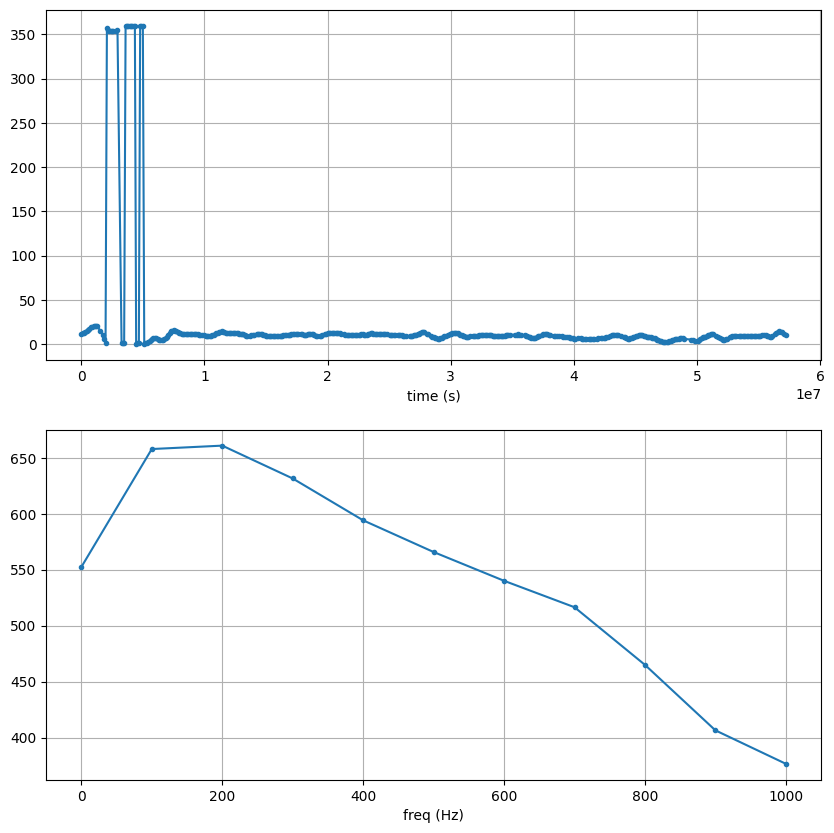

In [14]:
t = m4_fault5["TimeUS"]
y = m4_fault5["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

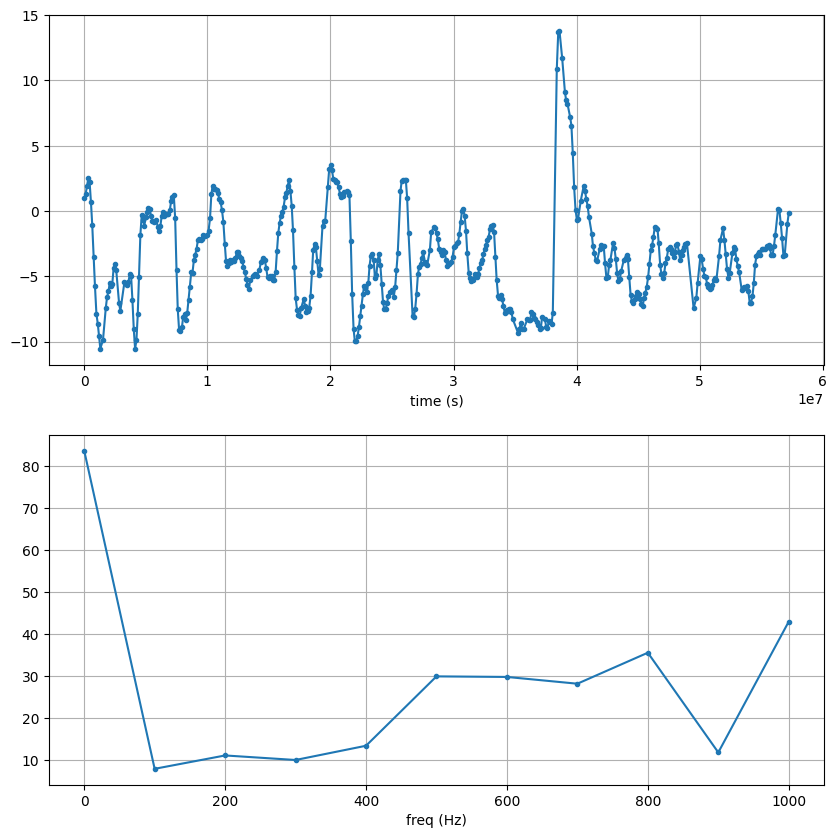

In [15]:
t = m4_fault5["TimeUS"]
y = m4_fault5["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

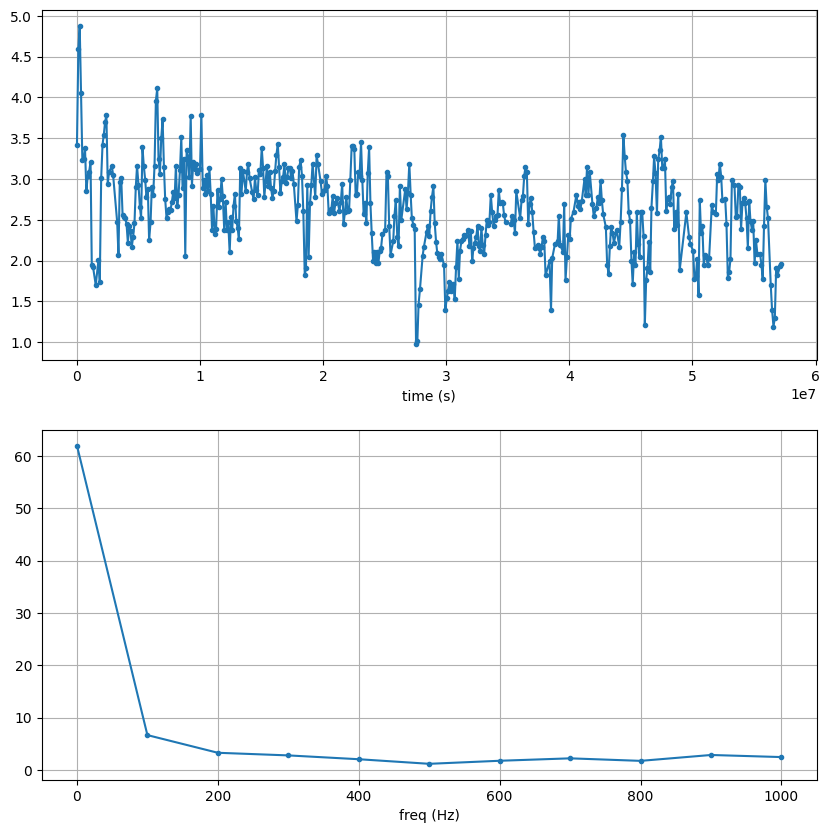

In [16]:
t = m4_fault5["TimeUS"]
y = m4_fault5["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

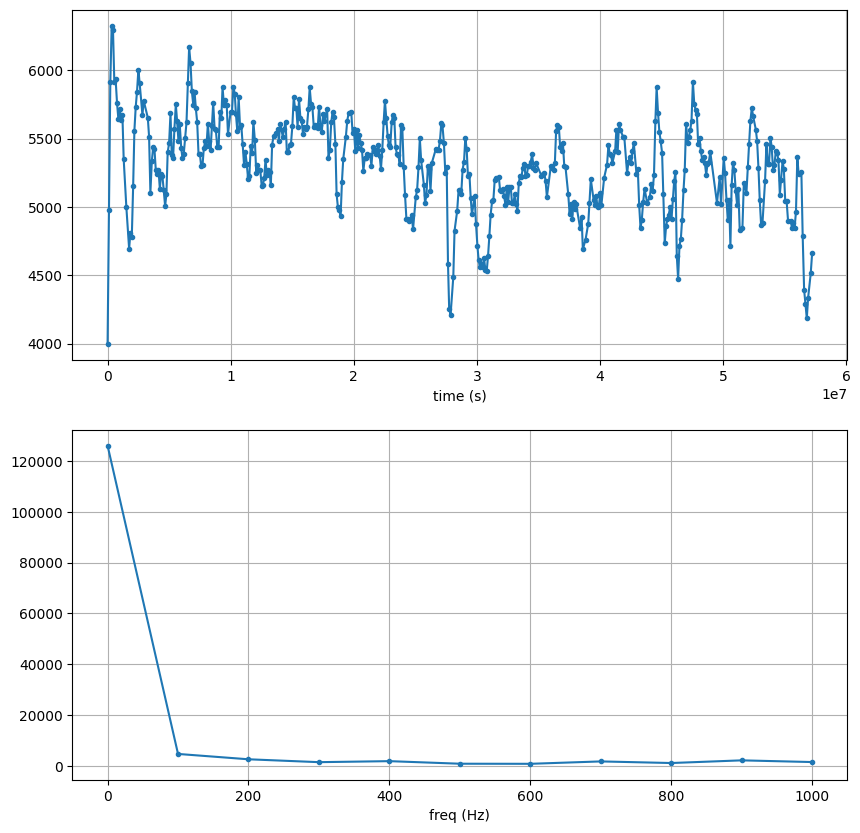

In [17]:
t = m4_fault5["TimeUS"]
y = m4_fault5["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

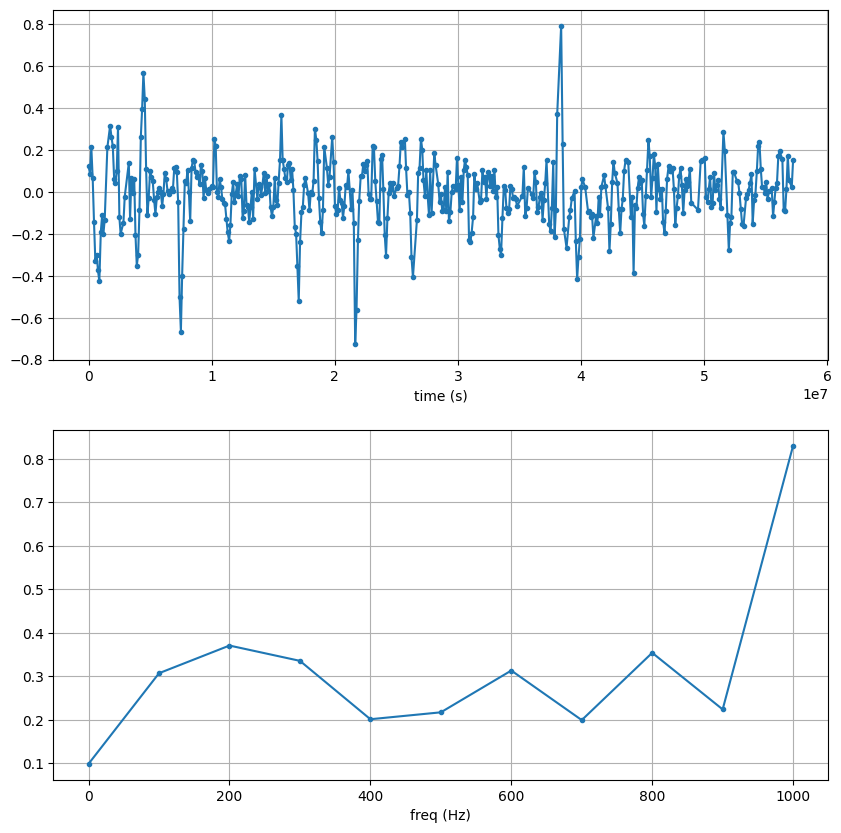

In [18]:
t = m4_fault5["TimeUS"]
y = m4_fault5["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

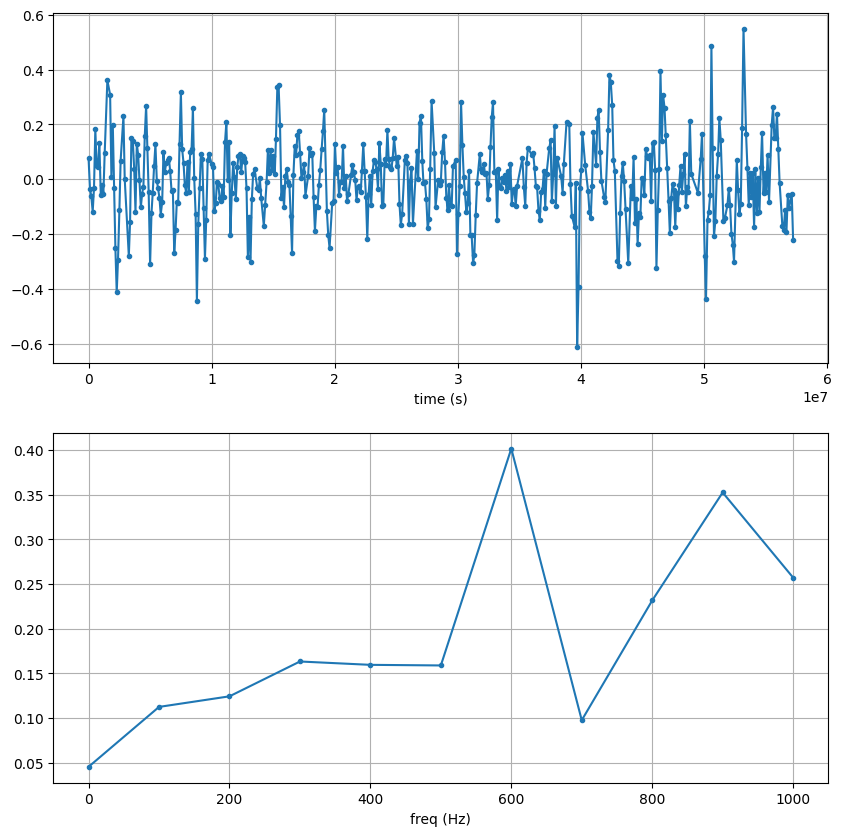

In [19]:
t = m4_fault5["TimeUS"]
y = m4_fault5["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

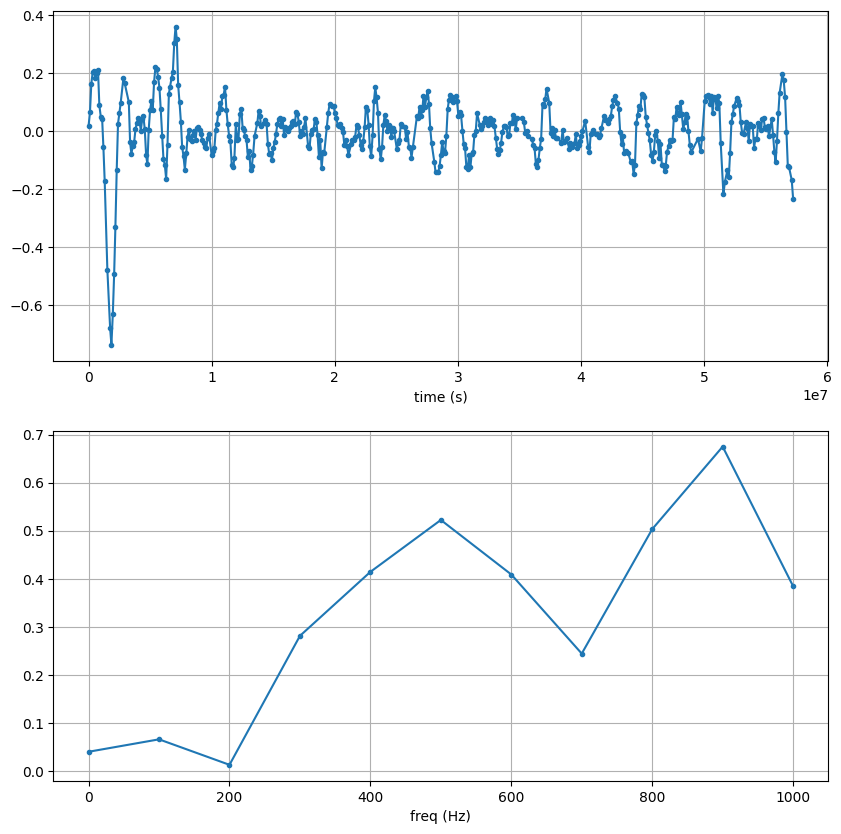

In [20]:
t = m4_fault5["TimeUS"]
y = m4_fault5["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

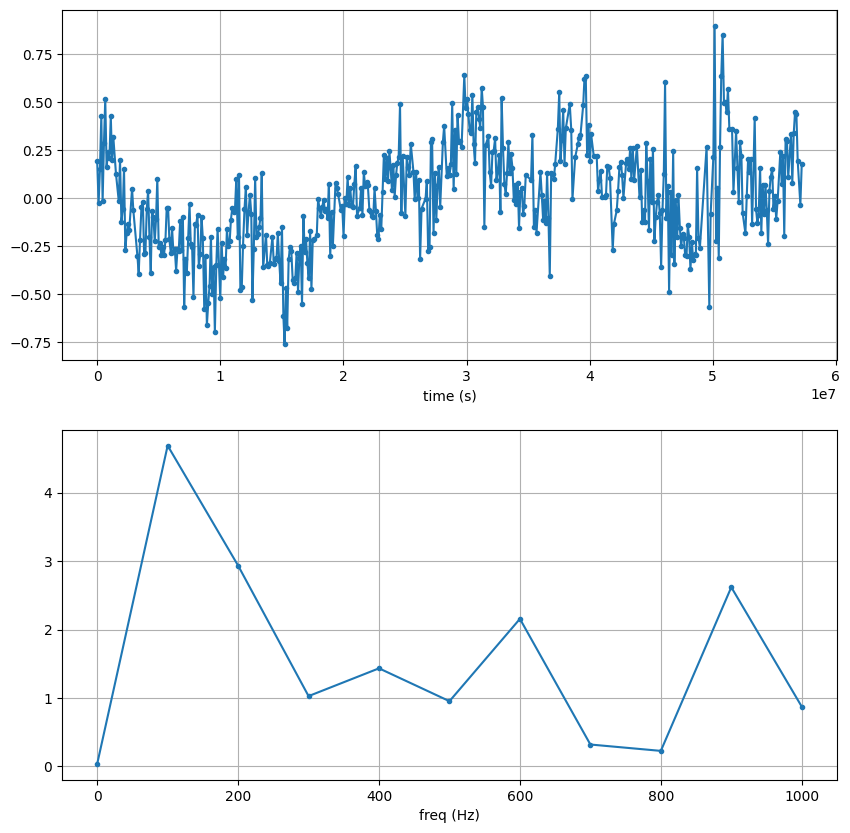

In [21]:
t = m4_fault5["TimeUS"]
y = m4_fault5["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

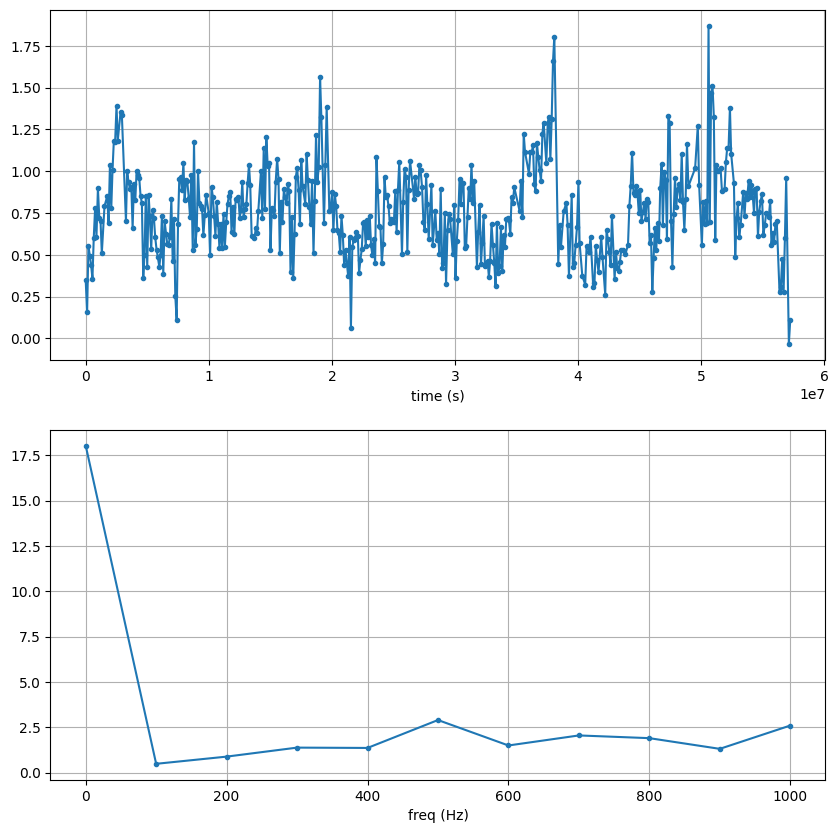

In [22]:
t = m4_fault5["TimeUS"]
y = m4_fault5["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

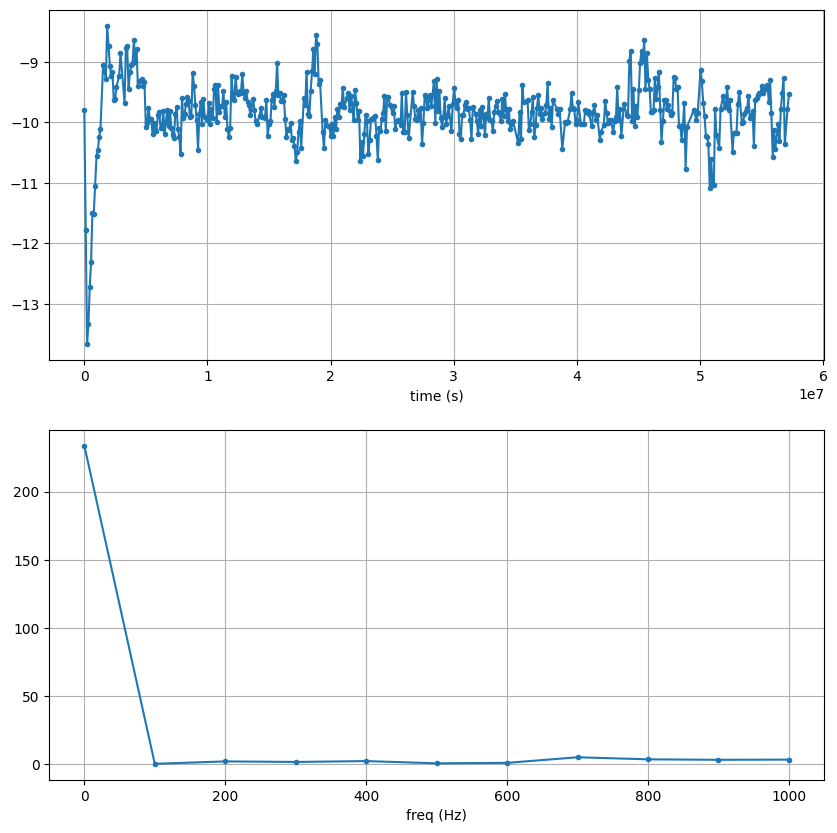

In [23]:
t = m4_fault5["TimeUS"]
y = m4_fault5["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()